In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pylab as pl
from scipy.spatial.distance import pdist, squareform
from scipy import stats
from scipy.stats import norm, skew
from sklearn.decomposition import PCA

In [2]:
f1 = pd.read_csv('Bank of America Corp..csv')
f2 = pd.read_csv('Bank of New York Mellon Corp..csv')
f3 = pd.read_csv('Capital One Financial Corp..csv')
f4 = pd.read_csv('Citigroup Inc..csv')
f5 = pd.read_csv('Wells Fargo & Co..csv') 
f6 = pd.read_csv('JPMorgan Chase & Co..csv')
f7 = pd.read_csv('Morgan Stanley.csv')
f8 = pd.read_csv('PNC Financial Services Group Inc..csv')
f9 = pd.read_csv('TD Group US Holdings LLC.csv')
f10 = pd.read_csv('U.S. Bancorp.csv')
f11 = pd.read_csv('Goldman Sachs Group Inc..csv')

In [3]:
fa = f1[['Date','Close']]
fb = f2[['Date','Close']]
fc = f3[['Date','Close']]
fd = f4[['Date','Close']]
fe = f5[['Date','Close']]
ff = f6[['Date','Close']]
fg = f7[['Date','Close']]
fh = f8[['Date','Close']]
fi = f9[['Date','Close']]
fj = f10[['Date','Close']]
fk = f11[['Date','Close']]

In [4]:
d1 = pd.merge(fa, fb, on ='Date', how = 'outer')
d2 = pd.merge(d1, fc, on ='Date', how = 'outer')
d3 = pd.merge(d2, fd, on ='Date', how = 'outer')
d4 = pd.merge(d3, fe, on ='Date', how = 'outer')
d5 = pd.merge(d4, ff, on ='Date', how = 'outer')
d6 = pd.merge(d5, fg, on ='Date', how = 'outer')
d7 = pd.merge(d6, fh, on ='Date', how = 'outer')
d8 = pd.merge(d7, fi, on ='Date', how = 'outer')
d9 = pd.merge(d8, fj, on ='Date', how = 'outer')
d = pd.merge(d9, fk, on ='Date', how = 'outer')
data = d.dropna()
data['1'] = 1
data.columns = ['Date', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','y', '1']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


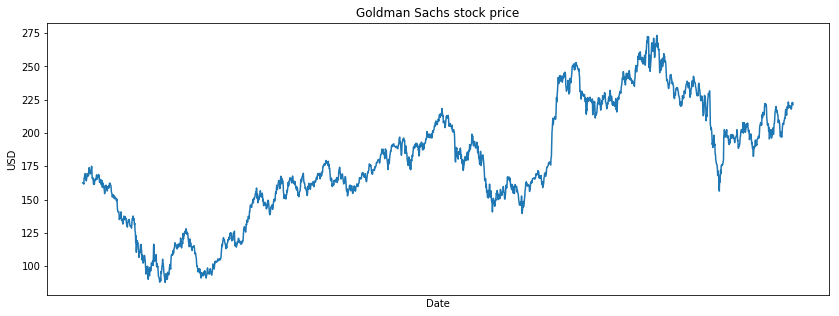

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['y'])
plt.xticks([],[])
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Goldman Sachs stock price')
plt.show()

In [6]:
d = data.set_index('Date')
df = d.sample(n=1000, random_state=1)
df.shape

(1000, 12)

In [7]:
mean_sd = pd.concat([df.mean(),df.std(ddof=1)],axis=1)
mean_sd.columns = ['MEAN','SD']
mean_sd

MEAN         SD
x1    18.032090   7.516083
x2    38.397800  10.799528
x3    73.249840  16.083413
x4    51.988290  13.170017
x5    45.906560   9.897209
x6    69.539850  26.492070
x7    33.447290  11.352777
x8    94.763810  30.615485
x9    55.603075  13.259158
x10   41.890220   9.400125
y    177.965210  43.106969
1      1.000000   0.000000

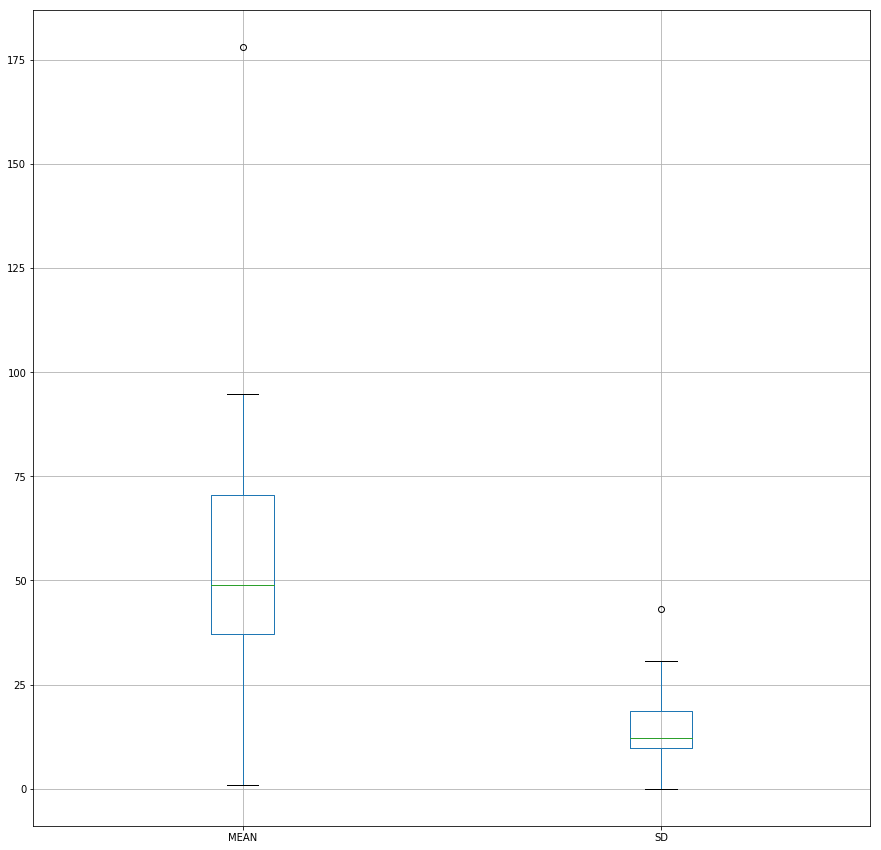

In [8]:
meansd_plot = mean_sd[['MEAN','SD']]
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
mean_sdPLOT = meansd_plot.boxplot()

In [9]:
f = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', '1']
X = df[f]
Y = df.iloc[:, 10]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape) 

(800, 11) (800,)
(200, 11) (200,)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 46.93 and sigma = 29.52



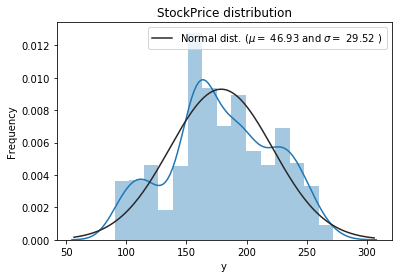

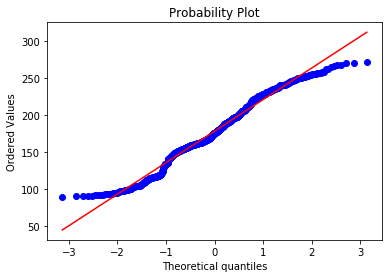

In [12]:
sns.distplot(y_train, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(x_test)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('StockPrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

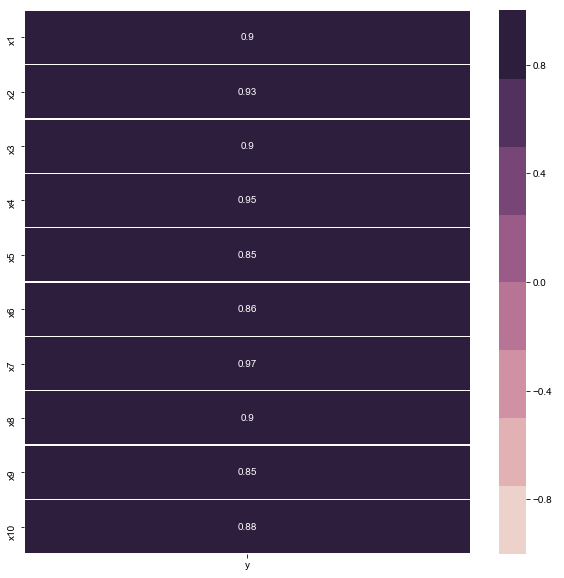

In [13]:
#list with all chemical factors
feat = ['x1','x2','x3','x4','x5','x6','x7','x8','x9', 'x10']
#calculate correlation between E.coli and chemical factors and store the result as data frame
a = pd.DataFrame(df[feat].corrwith(df['y']), columns=['y'])
#display correlation matrix between features
plt.figure(figsize=(10,10)) 
sns.heatmap(a, cmap=sns.cubehelix_palette(8), annot=True, linewidths=.5, vmin=-1, vmax=1)
sns.set(font_scale=1)

In [14]:
def top(df, n=3, column='y'):
    return df.sort_values(by=column)[-n:]
top(a)

y
x2  0.93296
x4  0.94787
x7  0.97079

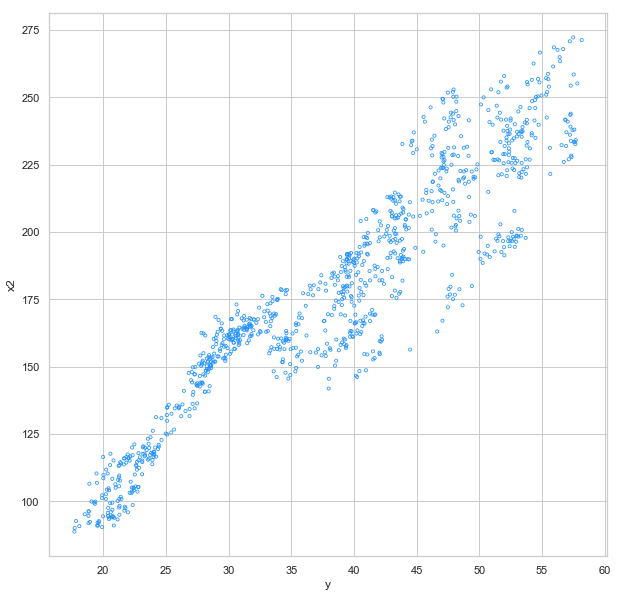

In [15]:
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
fig = sns.scatterplot(df['x2'], df['y'], facecolors='None', edgecolor='dodgerblue', s = 10)
plt.xlabel('y')
plt.ylabel('x2')
plt.show(fig)

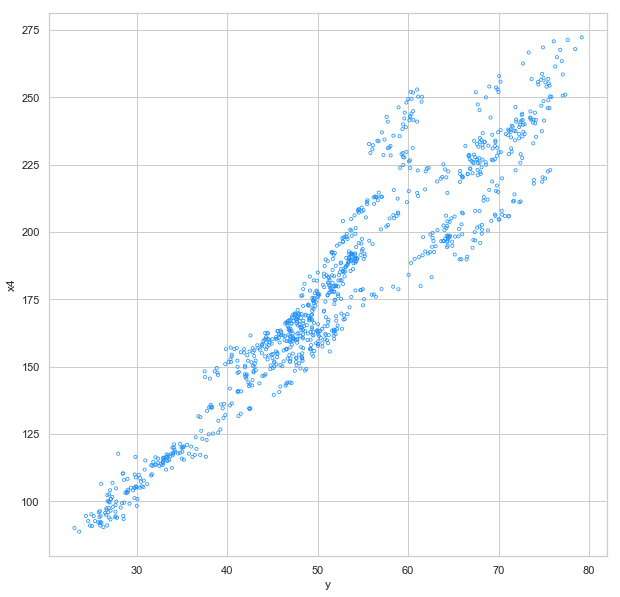

In [16]:
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
fig = sns.scatterplot(df['x4'], df['y'], facecolors='None', edgecolor='dodgerblue', s = 10)
plt.xlabel('y')
plt.ylabel('x4')
plt.show(fig)

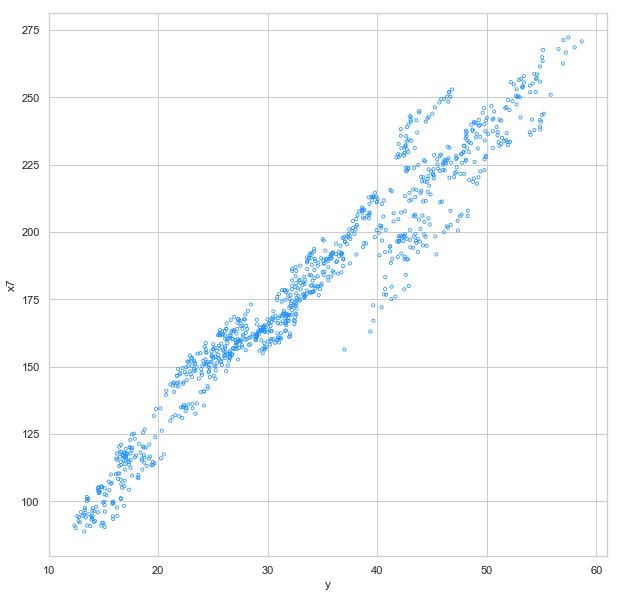

In [17]:
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
fig = sns.scatterplot(df['x7'], df['y'], facecolors='None', edgecolor='dodgerblue', s = 10)
plt.xlabel('y')
plt.ylabel('x7')
plt.show(fig)

## Q2

In [18]:
#Select random two lists  List1 and List 2 of 100 random integers each within   [1...m], m size of Train set
m = len(x_train)
L1 = np.random.randint(m, size = 100)
L2 = np.random.randint(m, size = 100)

In [19]:
#Euclidean Distance
def dist(a, b, ax=0):
    return np.linalg.norm(a - b, axis=ax)

gamma = 0.078


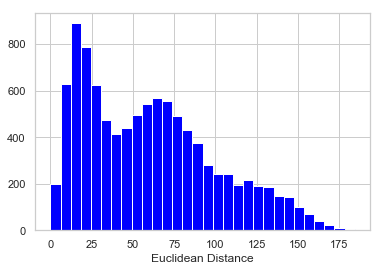

<Figure size 1080x1080 with 0 Axes>

In [20]:
#For all i in List 1 and all j in List2  compute Dij = ||X(i) -X(j)||
Dij=[]
for i in L1:
    for j in L2:
        Dij.append(dist(x_train.iloc[i],(x_train.iloc[j])))
        
plt.hist(Dij, bins=30,color='blue')
plt.xlabel('Euclidean Distance')
plt.figure(figsize=(15, 15))
plt.show

#Compute q = 10% quantile of the 10000 numbers Dij
Dij.sort()
q=Dij[900]
gamma=1/q
print('gamma =', round(gamma,3))

In [237]:
from scipy.spatial import distance_matrix
G = distance_matrix(x_train,x_train)
G = np.exp(-gamma*G)

In [238]:
# eigenvalues of G
e = np.linalg.eigvals(G)

<IPython.core.display.Javascript object>


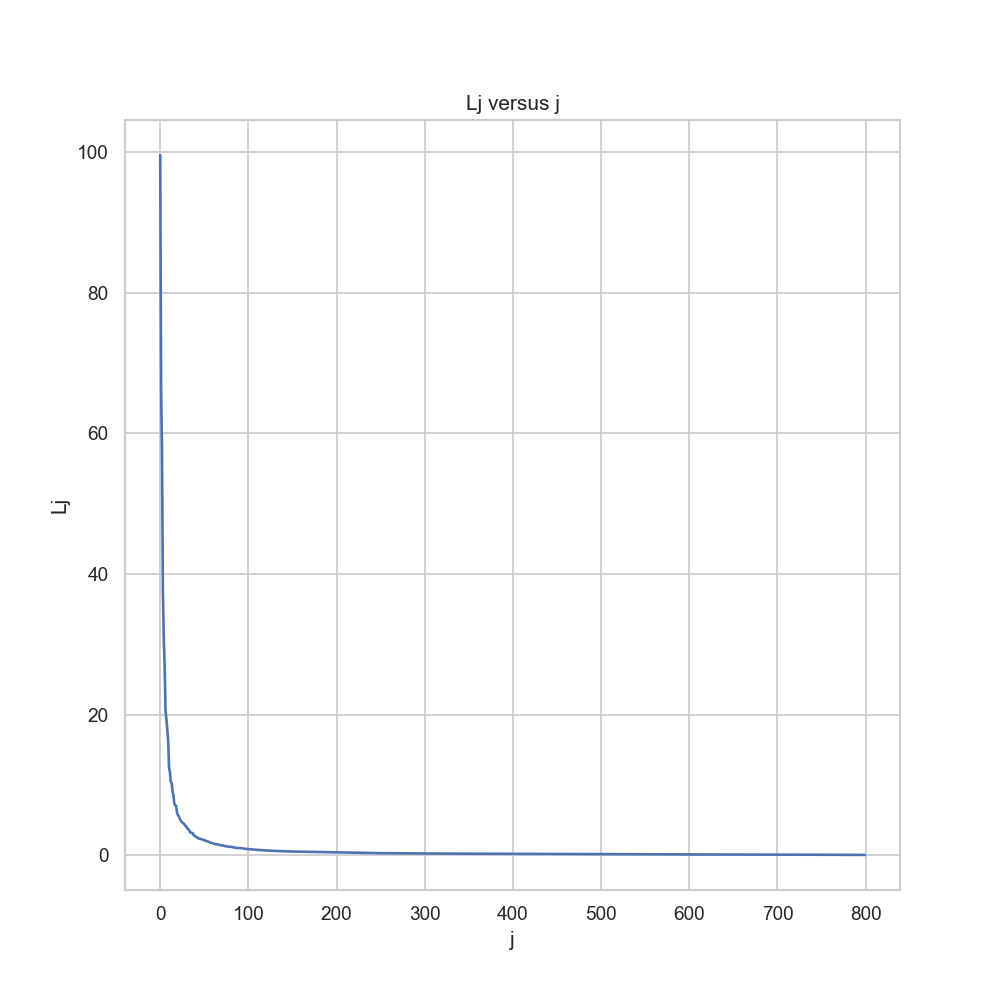

In [239]:
eigen = np.sort(e)[::-1]
N = len(eigen)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(N), eigen) 
ax.set(title='Lj versus j', ylabel='Lj', xlabel='j')
plt.show()

In [240]:
R=np.empty(N)
for i in np.arange(N):
    R[i]=sum(eigen[:i])/N
#print(R[5:])

<IPython.core.display.Javascript object>


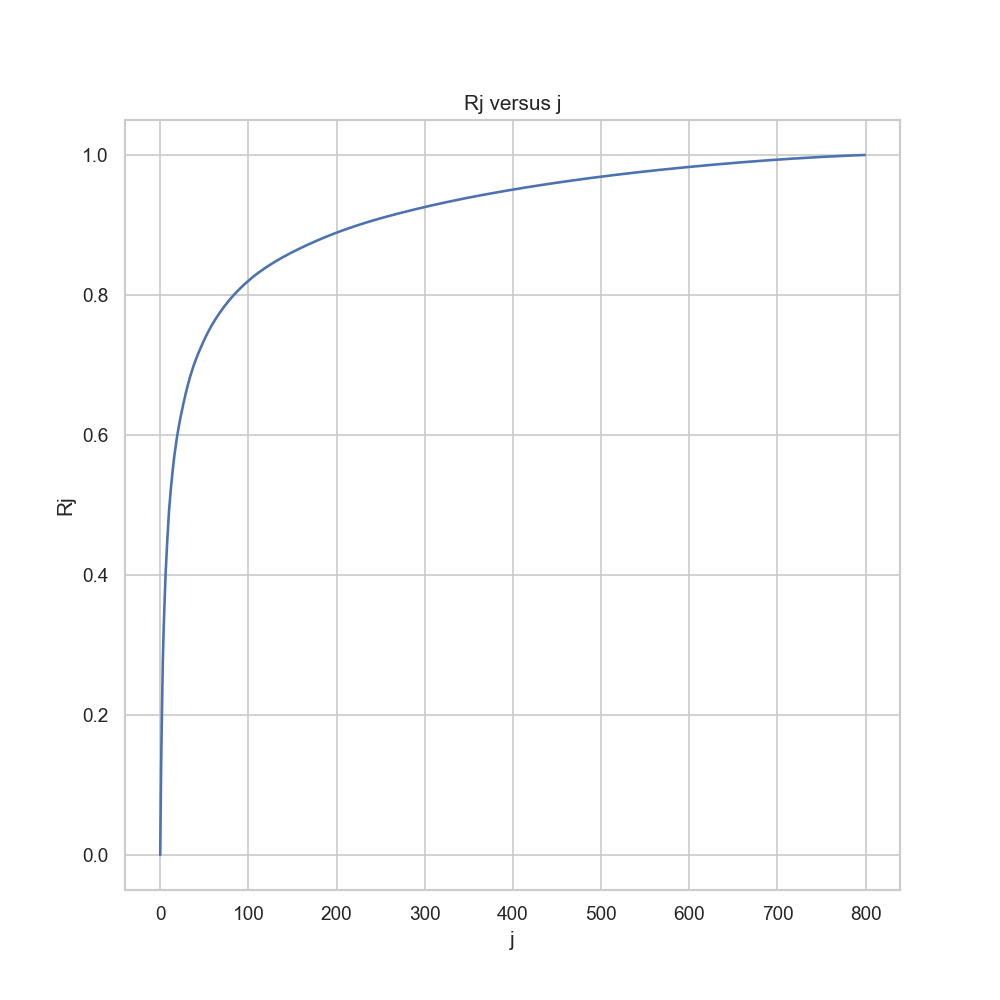

In [241]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(N), R) 
ax.set(title='Rj versus j', ylabel='Rj', xlabel='j')
plt.show()

In [242]:
for i in range(N):
    if R[i]>=0.95:
        min_r = i
        break
print(min_r, R[min_r])

398 0.9501575288150599


In [243]:
lamda = eigen[min_r]
round(lamda, 3)

0.17

In [244]:
#lambda_ID
lambda_i = lamda*np.identity(N)
#M and its inverse
M = G + lambda_i
M_inv = np.linalg.inv(M)
#alpha
A = M_inv.dot(y_train)

## prediction on Train set

In [245]:
import time
start_time = time.time()

def V_tr(x_ind):
    m = len(x_train)
    x = x_train.iloc[x_ind,:]
    V = np.empty(m)
    for i in range(m):
        V[i]= np.exp(-gamma*dist(x,x_train.iloc[i,:]))
    return V

def pred_tr(x_ind, A):
    pred = V_tr(x_ind).dot(A)
    return(pred)

pred_x_train = np.empty(m)
for i in range(m):
    pred_x_train[i]=pred_tr(i, A)

end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')


Time: 162.783 seconds.


In [248]:
#RMSE train
e = y_train - pred_x_train
RMSE_tr = np.sqrt(sum(e**2)/m)
print('RMSE for train set:', RMSE_tr)
av_ytr = sum(y_train)/len(y_train)
rtr = RMSE_tr/av_ytr
print('Resultant error for train set', rtr)

RMSE for train set: 1.8323985133430638
Resultant error for train set 0.010241940532906668


<IPython.core.display.Javascript object>


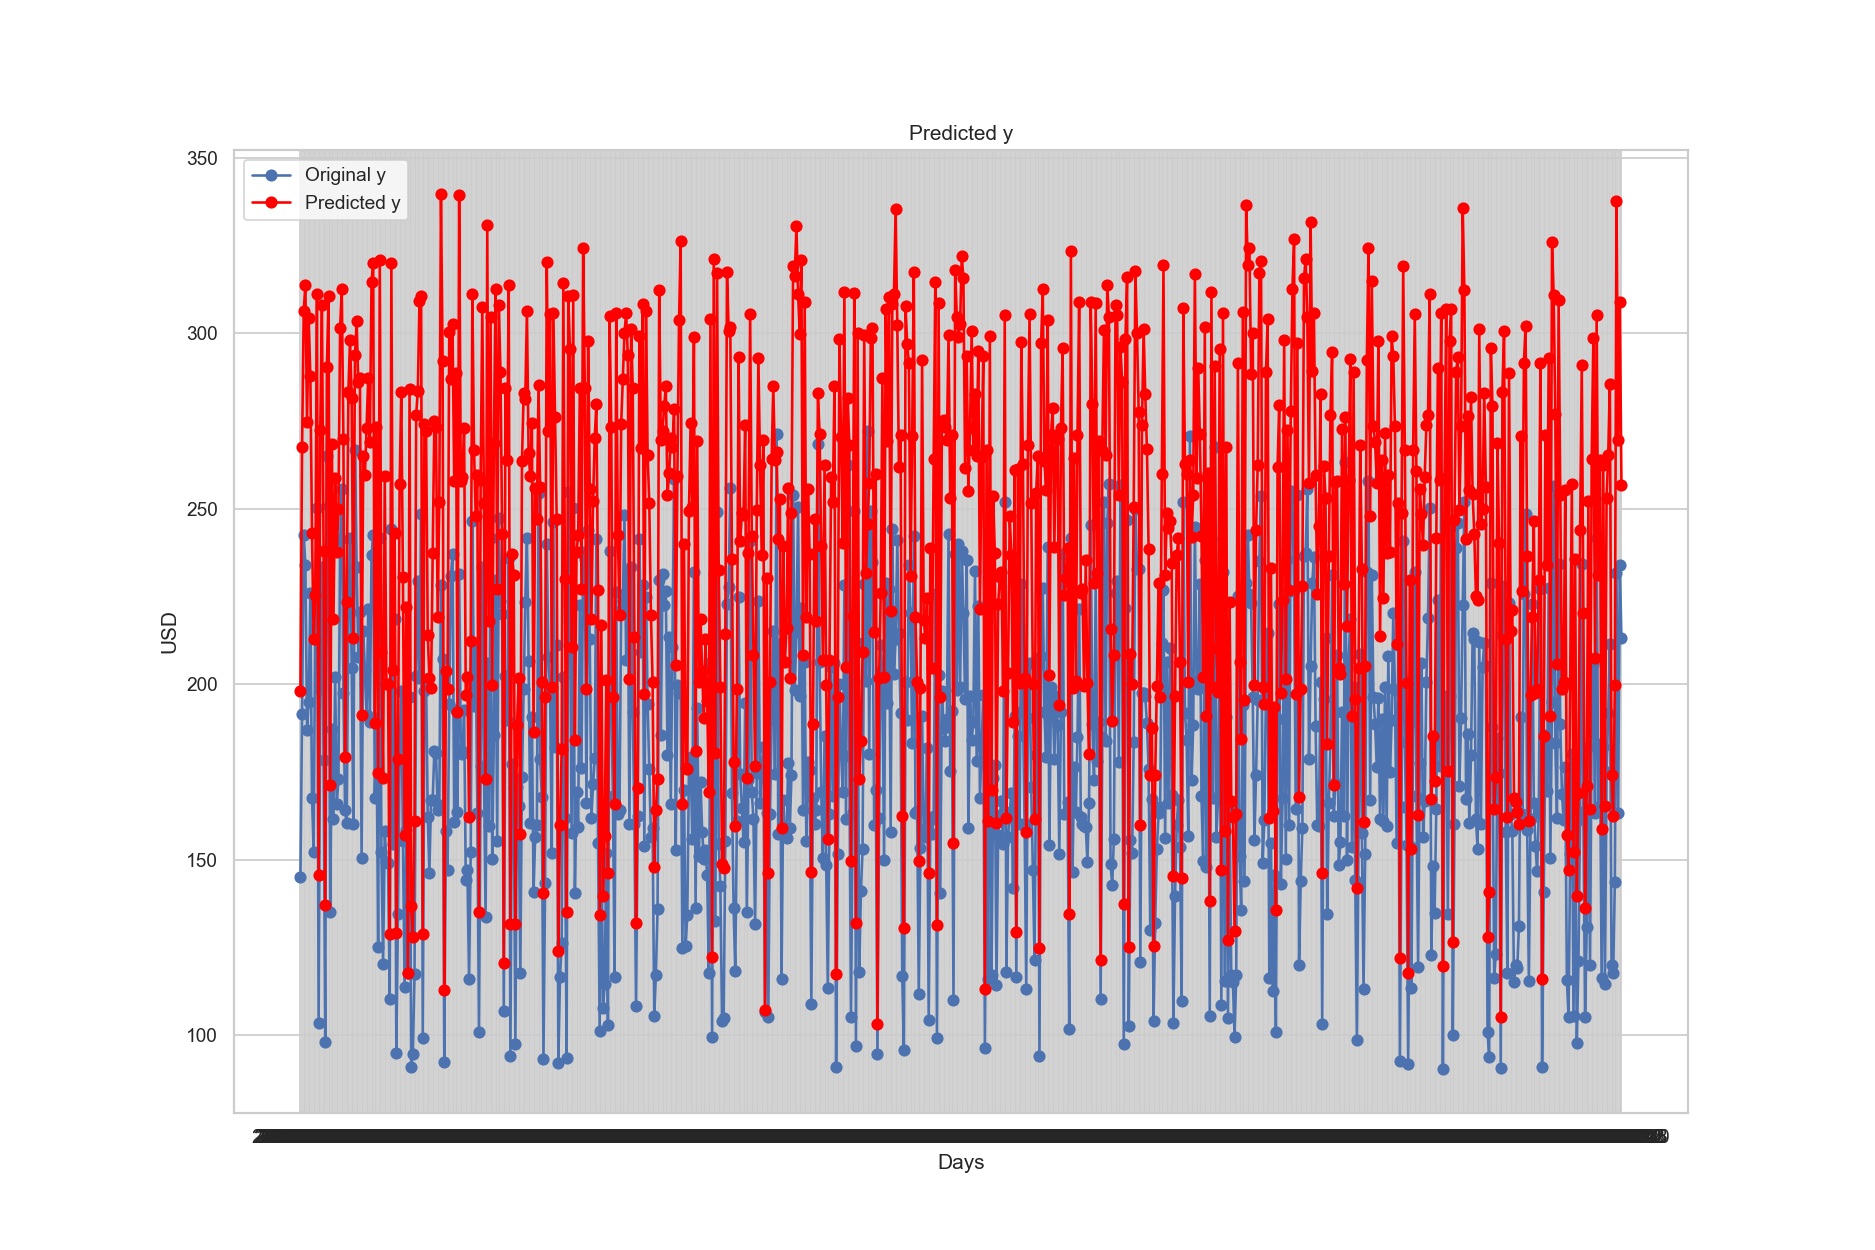

In [193]:
plt.figure(figsize=(15, 10))
plt.plot(y_train, label='Original y', marker = 'o')
plt.xticks([],[])
plt.plot(pred_x_train, color='red', label='Predicted y', marker = 'o')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Predicted y')
plt.legend()
plt.show()

## prediction on Test Set

In [249]:
import time
start_time = time.time()

def V_ts(x_ind):
    m = len(x_train)
    x = x_test.iloc[x_ind,:]
    V = np.empty(m)
    for i in range(m):
        V[i]= np.exp(-gamma*dist(x, x_train.iloc[i,:]))
    return V

def pred_ts(x_ind, A):
    pred = V_ts(x_ind).dot(A)
    return(pred)

t = len(x_test)
pred_x_test = np.empty(t)
for i in range(t):
    pred_x_test[i]=pred_ts(i, A)
    
end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')


Time: 38.967 seconds.


In [250]:
#RMSE test
t = len(x_test)
e = y_test - pred_x_test
RMSE_ts = np.sqrt(sum(e**2)/t)
print('RMSE for test set:', RMSE_ts)
av_yts = sum(y_test)/len(y_test)
rts = RMSE_ts/av_yts
print('Resultant error for test set', rts)

RMSE for test set: 5.918796084753308
Resultant error for test set 0.033980721625032365


<IPython.core.display.Javascript object>


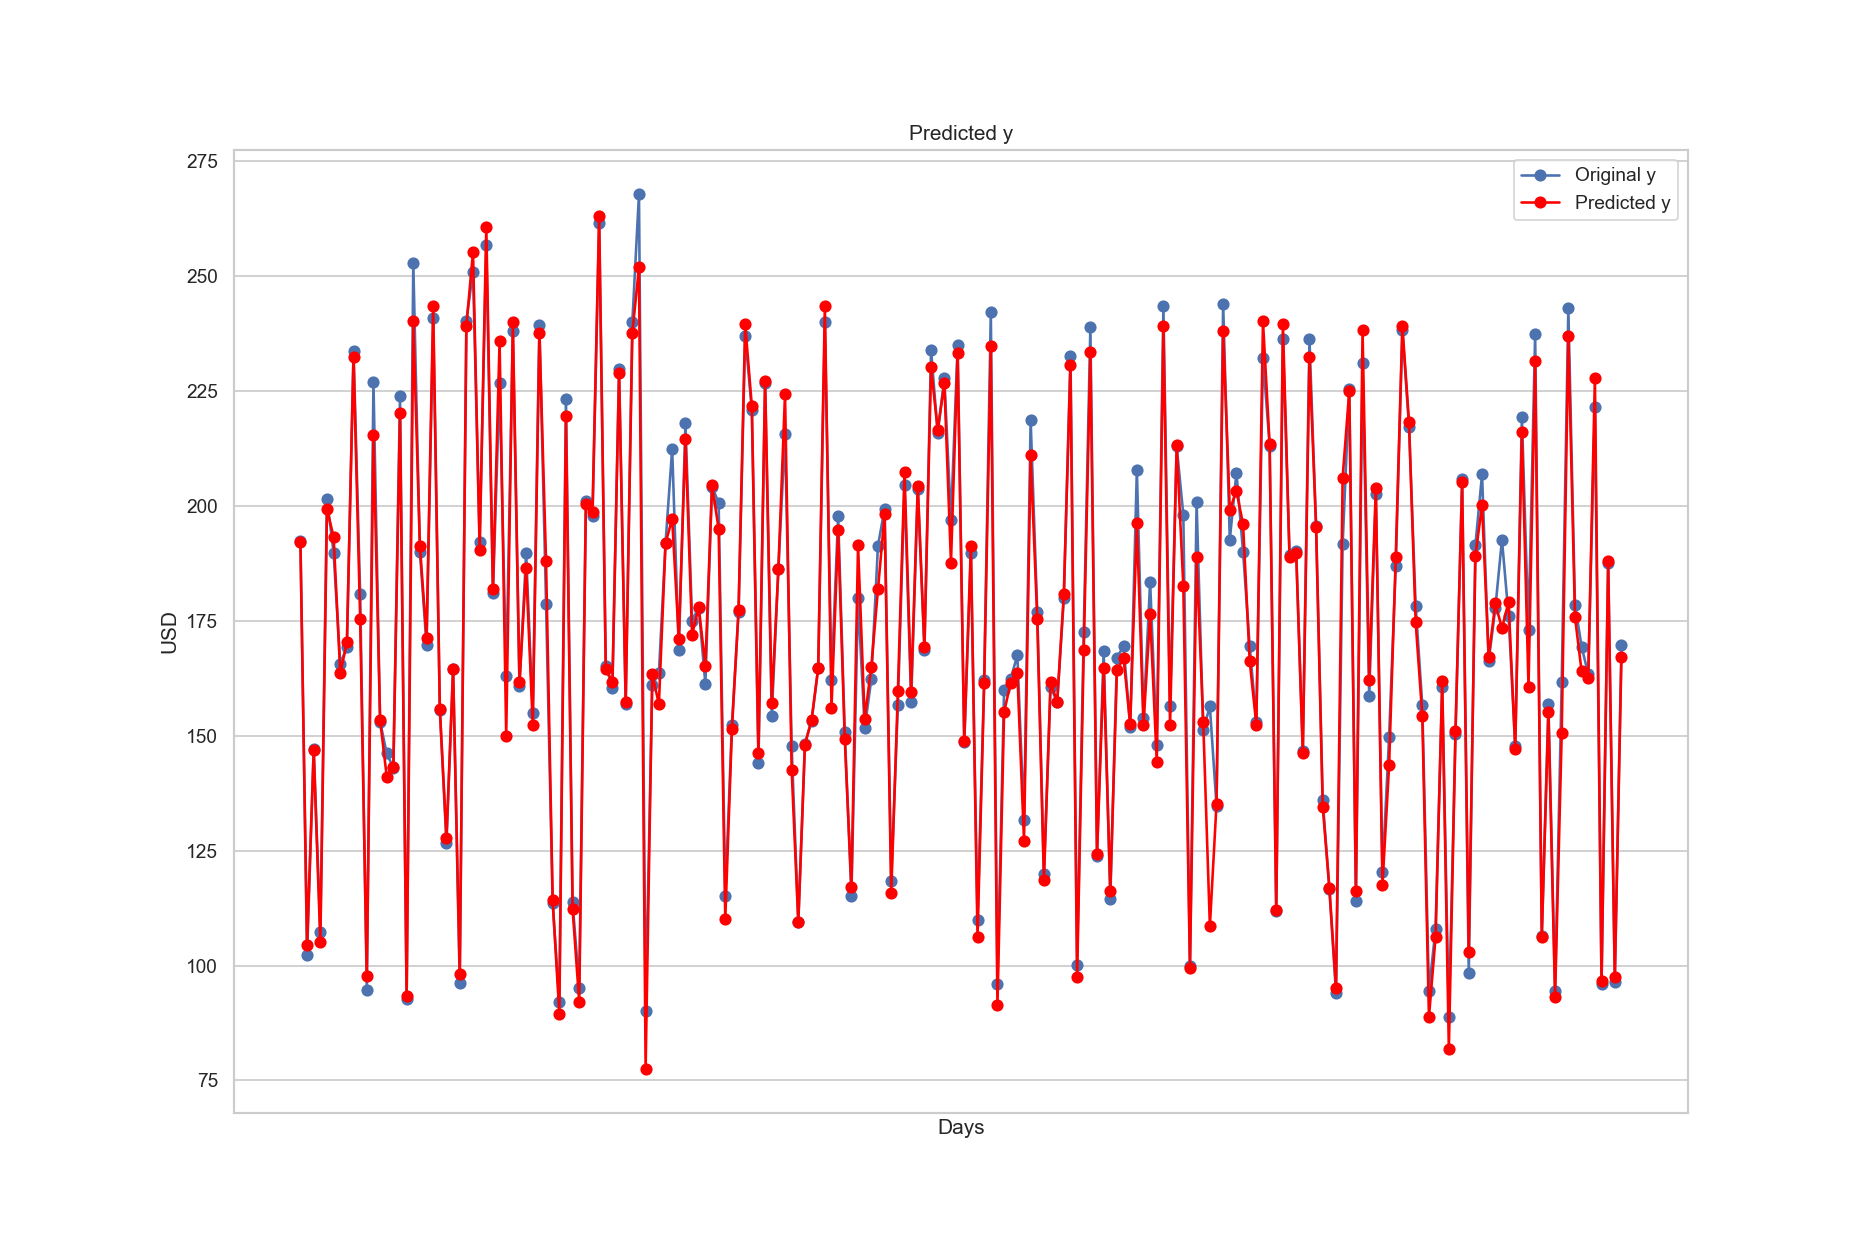

In [251]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, label='Original y', marker = 'o')
plt.plot(pred_x_test, color='red', label='Predicted y', marker = 'o')
plt.xticks([],[])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Predicted y')
plt.legend()
plt.show()

## Q3

In [108]:
import time
start_time = time.time()

def optim(my_g, my_l):
    Gr = distance_matrix(x_train,x_train)
    Gr = np.exp(-my_g*Gr)
    eig = np.linalg.eigvals(Gr)
    N = len(eig)
    lamb_i = my_l*np.identity(N)
    Mx = Gr + lamb_i
    Minv = np.linalg.inv(Mx)
    Ax = Minv.dot(y_train)

    l_tr = len(x_train)
    l_ts = len(x_test)
    
    pred_train = np.empty(l_tr)
    for i in range(l_tr):
        pred_train[i]=pred_tr(i, Ax)
    etr = y_train - pred_train
    RMSEtr = np.sqrt(sum(etr**2)/l_tr)
    avytr = sum(y_train)/len(y_train)
    res_tr = RMSEtr/avytr
    print('RMSE for training set is', RMSEtr)
    print('The resultant error for training set is', res_tr)
    
    pred_test = np.empty(l_ts)
    for i in range(l_ts):
        pred_test[i]=pred_ts(i, Ax)
    ets = y_test - pred_test
    RMSEts = np.sqrt(sum(ets**2)/l_ts) 
    avyts = sum(y_test)/len(y_test)
    res_ts = RMSEts/avyts
    print('RMSE for test set is', RMSEts)
    print('The resultant error for test set is', res_ts)
    
    
end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')


Time: 0.0 seconds.


## Tuning parameters

In [109]:
#smaller gamma, l = const
import time
start_time = time.time()

optim(0.001, 0.168)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 330.1793739882247
The resultant error for training set is 1.8454923909592948
RMSE for test set is 332.626039226255
The resultant error for test set is 1.9096574172069258

Time: 471.377 seconds.


In [110]:
#smaller gamma, l = const
import time
start_time = time.time()

optim(0.01, 0.168)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 165.09700790219568
The resultant error for training set is 0.9227871146927391
RMSE for test set is 164.52723869725054
The resultant error for test set is 0.9445762648096945

Time: 497.588 seconds.


In [111]:
#bigger gamma, l = const
import time
start_time = time.time()

optim(0.1, 0.168)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 135.95562403038798
The resultant error for training set is 0.7599053406199497
RMSE for test set is 131.36427667576788
The resultant error for test set is 0.7541825826187508

Time: 506.511 seconds.


In [112]:
# gamma = const, smaller l
import time
start_time = time.time()

optim(0.5, 0.168)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 4456.815196659017
The resultant error for training set is 24.910758155472486
RMSE for test set is 4263.846477249753
The resultant error for test set is 24.479400560618846

Time: 483.522 seconds.


In [114]:
# gamma = const, smaller l
import time
start_time = time.time()

optim(0.073, 1)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 11.42908412262878
The resultant error for training set is 0.06388130042519652
RMSE for test set is 12.118738912700723
The resultant error for test set is 0.06957555008521542

Time: 477.44 seconds.


In [115]:
# gamma = const, bigger l 
import time
start_time = time.time()

optim(0.073, 0.5)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 12.200848871336403
The resultant error for training set is 0.06819497379051499
RMSE for test set is 12.583530736616613
The resultant error for test set is 0.07224399166622575

Time: 470.829 seconds.


In [117]:
# gamma = const, smaller l
import time
start_time = time.time()

optim(0.01, 0.9)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 161.45638579334926
The resultant error for training set is 0.9024383560192979
RMSE for test set is 159.25564318011467
The resultant error for test set is 0.9143112215099254

Time: 473.766 seconds.


In [118]:
# gamma = const, smaller l
import time
start_time = time.time()

optim(0.1, 0.5)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 130.6278300469087
The resultant error for training set is 0.7301263658210565
RMSE for test set is 126.02808949381786
The resultant error for test set is 0.7235467086044381

Time: 472.848 seconds.


In [119]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.073, 1.5 )


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 11.001435770771135
The resultant error for training set is 0.061491018531368374
RMSE for test set is 11.941280260644449
The resultant error for test set is 0.06855673258092408

Time: 475.514 seconds.


In [121]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.05, 1.5)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 67.47800302506248
The resultant error for training set is 0.3771590564113258
RMSE for test set is 66.55977962496647
The resultant error for test set is 0.38212996536334554

Time: 208.885 seconds.


In [123]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.07, 1.5)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 7.2293013982106915
The resultant error for training set is 0.04040719007125208
RMSE for test set is 9.756781216110168
The resultant error for test set is 0.05601518648615564

Time: 197.565 seconds.


In [126]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.07, 1)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 5.505386680901052
The resultant error for training set is 0.030771604858799817
RMSE for test set is 8.234685793004846
The resultant error for test set is 0.047276601794496415

Time: 191.328 seconds.


In [128]:
import time
start_time = time.time()

optim(0.07, 0.95)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 5.321346868488838
The resultant error for training set is 0.02974293953262342
RMSE for test set is 8.07544032578954
The resultant error for test set is 0.04636234899477066

Time: 190.538 seconds.


In [130]:
import time
start_time = time.time()

optim(0.07, 0.9)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 5.134740216688017
The resultant error for training set is 0.028699927209227687
RMSE for test set is 7.914657014868291
The resultant error for test set is 0.04543926719703143

Time: 190.14 seconds.


In [214]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.073, 0.168)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 11.456222593059564
The resultant error for training set is 0.06403298718890113
RMSE for test set is 11.7335774376197
The resultant error for test set is 0.06736427862426246

Time: 197.052 seconds.


In [124]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.069, 1.52)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 9.067606892720578
The resultant error for training set is 0.05068214686639595
RMSE for test set is 11.363639531399816
The resultant error for test set is 0.06524040802122087

Time: 201.154 seconds.


In [122]:
#gamma = const, smaller l
import time
start_time = time.time()

optim(0.06, 2)


end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 37.67876153466701
The resultant error for training set is 0.210600277276792
RMSE for test set is 37.968772059190194
The resultant error for test set is 0.21798457918007896

Time: 201.98 seconds.


In [254]:
## pred with best parameters
import time
start_time = time.time()

def pred_best(my_g, my_l):
    Gr = distance_matrix(x_train,x_train)
    Gr = np.exp(-my_g*Gr)
    eig = np.linalg.eigvals(Gr)
    N = len(eig)
    lamb_i = my_l*np.identity(N)
    Mx = Gr + lamb_i
    Minv = np.linalg.inv(Mx)
    Ax = Minv.dot(y_train)

    l_tr = len(x_train)
    l_ts = len(x_test)
    
    pred_train = np.empty(l_tr)
    for i in range(l_tr):
        pred_train[i]=pred_tr(i, Ax)
    etr = y_train - pred_train
    RMSEtr = np.sqrt(sum(etr**2)/l_tr)
    avytr = sum(y_train)/len(y_train)
    res_tr = RMSEtr/avytr
    print('RMSE for training set is', RMSEtr)
    print('The resultant error for training set is', res_tr)
    
    pred_test = np.empty(l_ts)
    for i in range(l_ts):
        pred_test[i]=pred_ts(i, Ax)
    ets = y_test - pred_test
    RMSEts = np.sqrt(sum(ets**2)/l_ts) 
    avyts = sum(y_test)/len(y_test)
    res_ts = RMSEts/avyts
    print('RMSE for test set is', RMSEts)
    print('The resultant error for test set is', res_ts)
    
    E = y_test - pred_test
    E_sq = E**2
    E_sq.sort_values(inplace=True)
    bad_guys = E_sq[-10:]
    return bad_guys
    
end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')


Time: 0.0 seconds.


In [277]:
## pred with best parameters
import time
start_time = time.time()

def pred_best2(my_g, my_l):
    Gr = distance_matrix(x_train,x_train)
    Gr = np.exp(-my_g*Gr)
    eig = np.linalg.eigvals(Gr)
    N = len(eig)
    lamb_i = my_l*np.identity(N)
    Mx = Gr + lamb_i
    Minv = np.linalg.inv(Mx)
    Ax = Minv.dot(y_train)

    l_tr = len(x_train)
    l_ts = len(x_test)
    
    pred_train = np.empty(l_tr)
    for i in range(l_tr):
        pred_train[i]=pred_tr(i, Ax)
    etr = y_train - pred_train
    RMSEtr = np.sqrt(sum(etr**2)/l_tr)
    avytr = sum(y_train)/len(y_train)
    res_tr = RMSEtr/avytr
    print('RMSE for training set is', RMSEtr)
    print('The resultant error for training set is', res_tr)
    
    pred_test = np.empty(l_ts)
    for i in range(l_ts):
        pred_test[i]=pred_ts(i, Ax)
    ets = y_test - pred_test
    RMSEts = np.sqrt(sum(ets**2)/l_ts) 
    avyts = sum(y_test)/len(y_test)
    res_ts = RMSEts/avyts
    print('RMSE for test set is', RMSEts)
    print('The resultant error for test set is', res_ts)
    
    E = y_test - pred_test
    E_sq = E**2
    E_sq.sort_values(inplace=True)
    good_guys = E_sq[:10]
    return good_guys
    
end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')


Time: 0.0 seconds.


In [253]:
import time
start_time = time.time()

att = pred_best(0.07, 0.9)

end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 23.00455857908195
The resultant error for training set is 0.12858082957231357
RMSE for test set is 24.071968125718882
The resultant error for test set is 0.13820088344550538

Time: 199.299 seconds.


In [278]:
import time
start_time = time.time()

att2 = pred_best2(0.07, 0.9)

end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 5.557391131127988
The resultant error for training set is 0.031062276611037304
RMSE for test set is 8.325056304946687
The resultant error for test set is 0.04779543284821658

Time: 196.279 seconds.


In [283]:
att2

Date
2011-10-26    0.000087
2018-03-01    0.000624
2016-06-03    0.003502
2019-01-10    0.006248
2014-08-27    0.007102
2012-07-18    0.016287
2017-10-19    0.020274
2016-09-02    0.029170
2012-09-25    0.062301
2013-05-09    0.084272
Name: y, dtype: float64

<IPython.core.display.Javascript object>


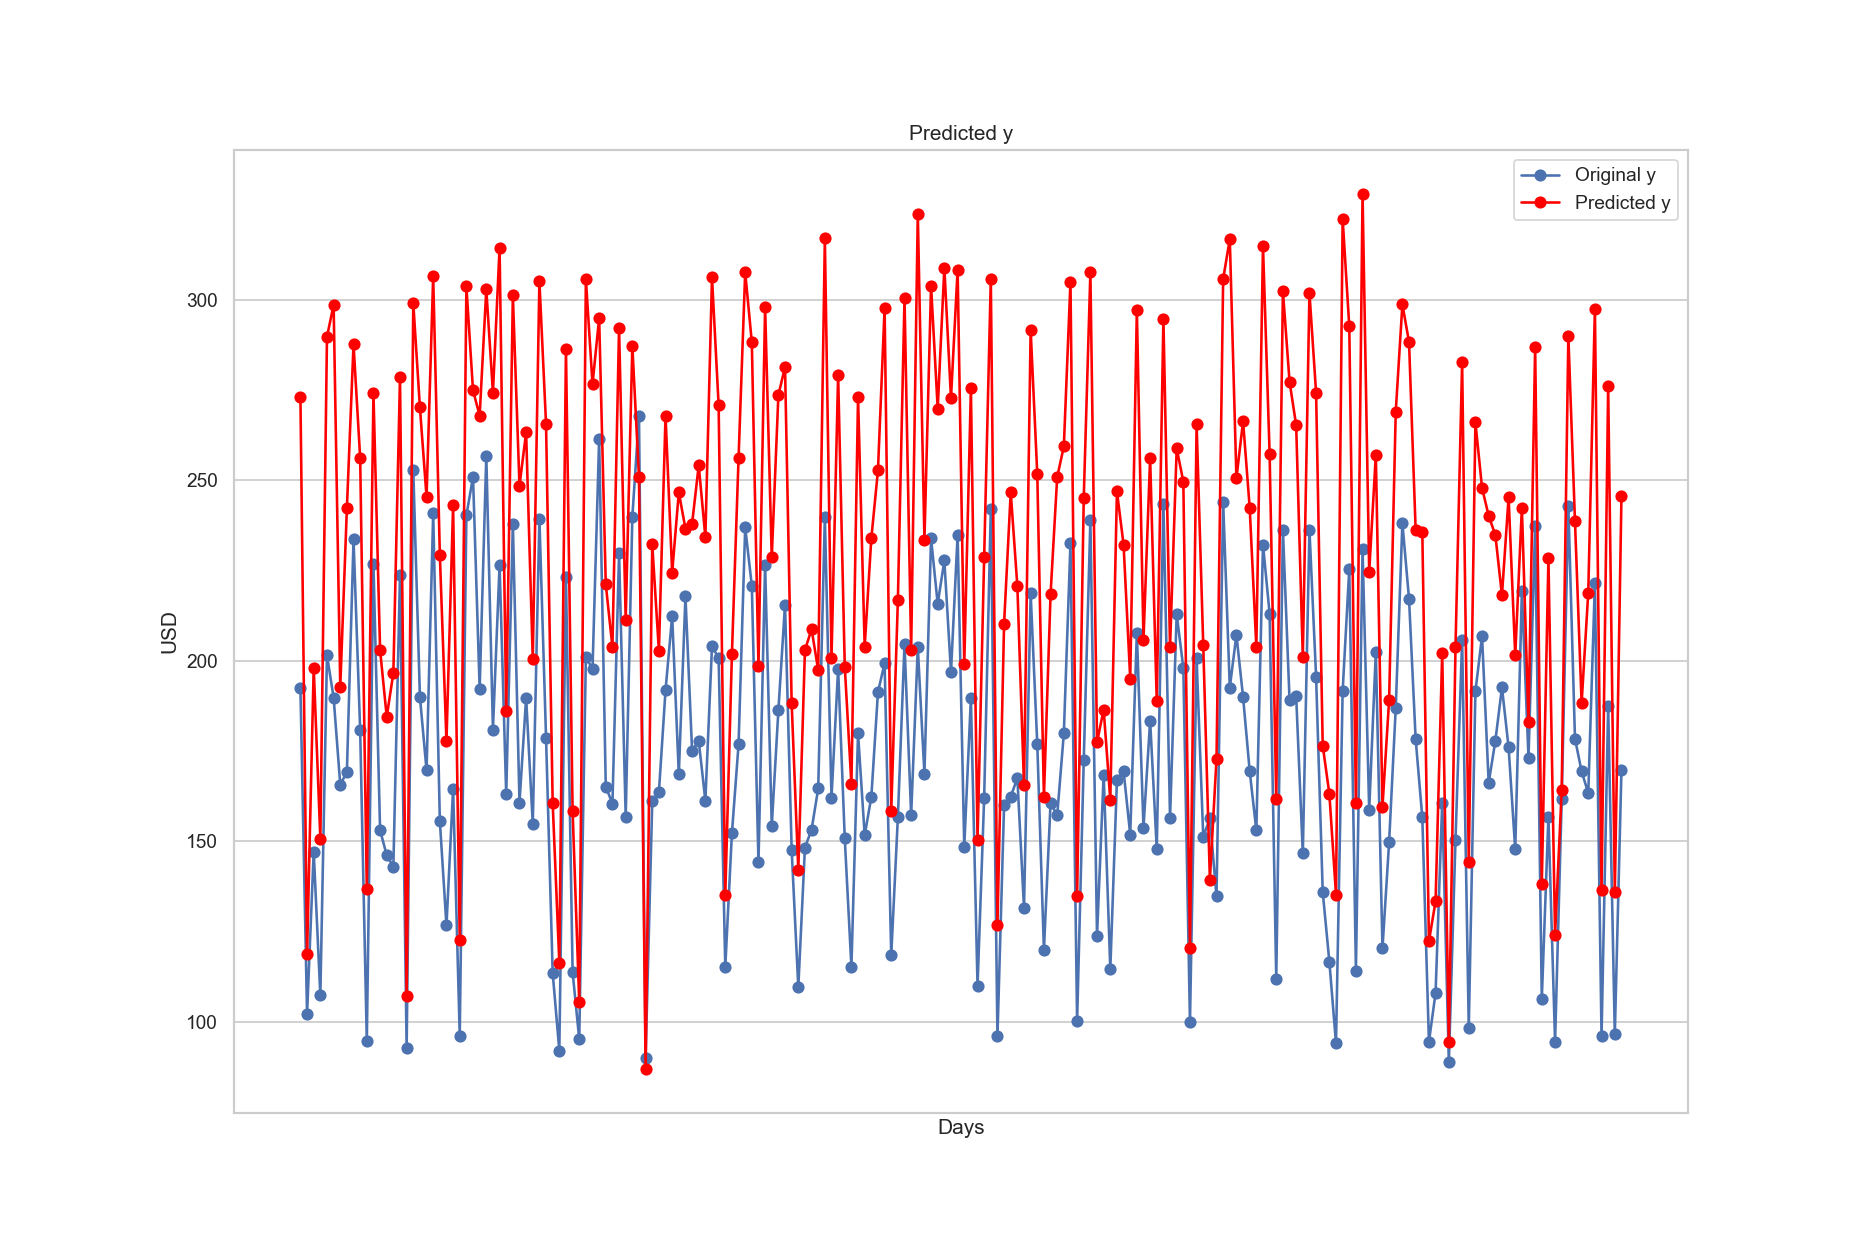

In [255]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, label='Original y', marker = 'o')
plt.plot(pred_test, color='red', label='Predicted y', marker = 'o')
plt.xticks([],[])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Predicted y')
plt.legend()
plt.show()

In [134]:
print(att)
type(att)

Date
2017-03-03     315.730705
2011-01-04     330.117525
2018-12-28     386.820324
2018-12-03     414.503618
2010-12-07     420.213064
2019-08-27     468.015107
2016-11-09     493.400508
2015-07-20     674.713686
2018-01-31    1642.930973
2018-12-24    2219.701335
Name: y, dtype: float64


pandas.core.series.Series

<IPython.core.display.Javascript object>


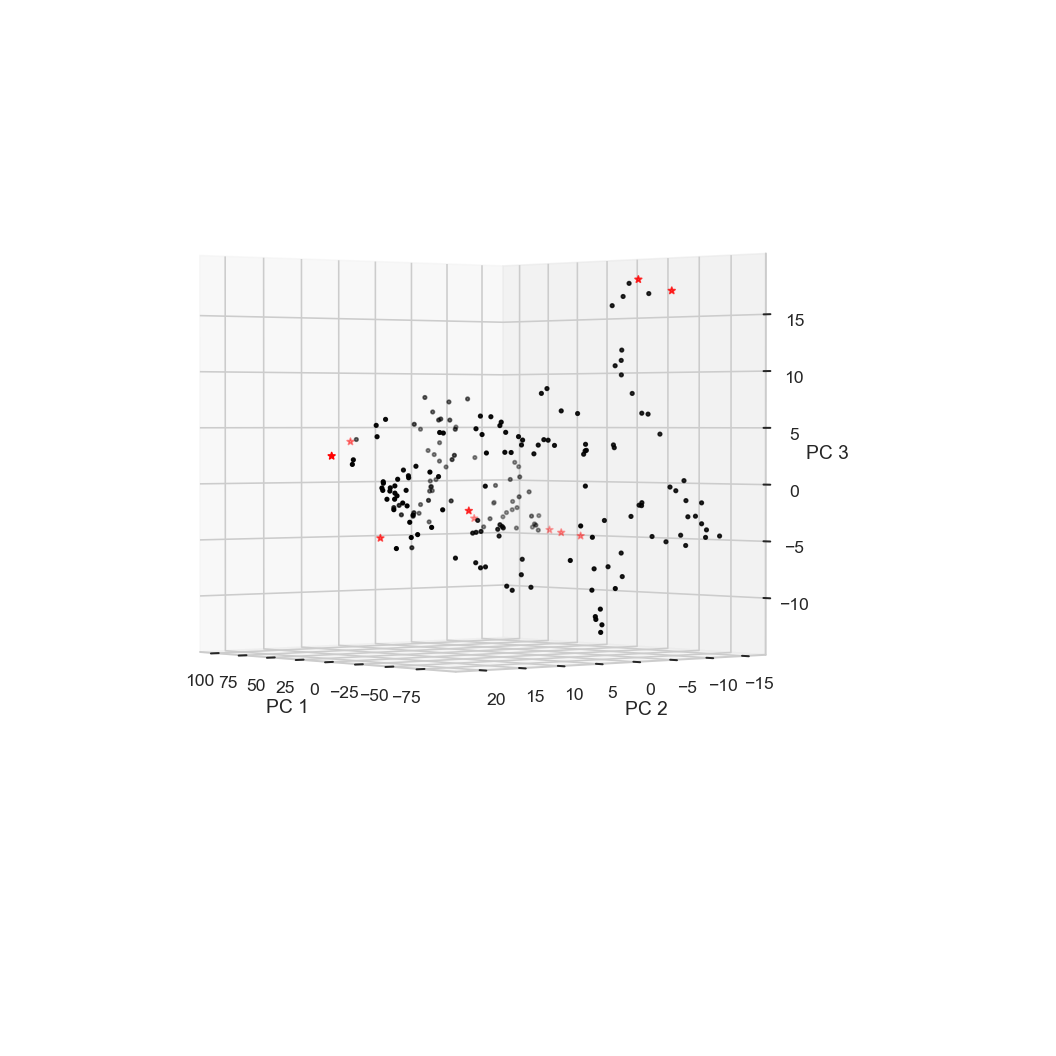

Text(0.5, 0, 'PC 3')

In [141]:
pca_data = pd.DataFrame(x_test.drop(['1'], axis = 1))
pca = PCA(n_components = 3)
principal3Components = pca.fit_transform(pca_data)
principal3Df = pd.DataFrame(data = principal3Components, columns = ['principal component 1', 'principal component 2', 'principal component 3'], index = pca_data.index)
pca.fit(principal3Components)
bad_guy_index_list = att.index.tolist()
error_data = principal3Df[principal3Df.index.isin(bad_guy_index_list)]
principal3Df = principal3Df.drop([bad_guy_index_list[i] for i in range(10)], axis = 0)

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')

x = principal3Df.iloc[:, 0]
y = principal3Df.iloc[:, 1]
z = principal3Df.iloc[:, 2]

a = error_data.iloc[:, 0]
b = error_data.iloc[:, 1]
c = error_data.iloc[:, 2]

ax.scatter(a, b, c, c = 'red', marker = '*')
ax.scatter(x, y, z, c = 'black', marker = '.')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

## Q4

In [259]:
g =0.07
L = 0.9
Gram = distance_matrix(x_train,x_train)
Gram = np.exp(-g*Gram)
eig = np.linalg.eigvals(Gram)
N = len(eig)
lam = L*np.identity(N)
Matrix = Gram + lam
Minverse = np.linalg.inv(Matrix)
A_best = Minverse.dot(y_train)

In [260]:
A_abs = np.absolute(A_best)
B = np.sort(A_abs)[::-1]

<IPython.core.display.Javascript object>


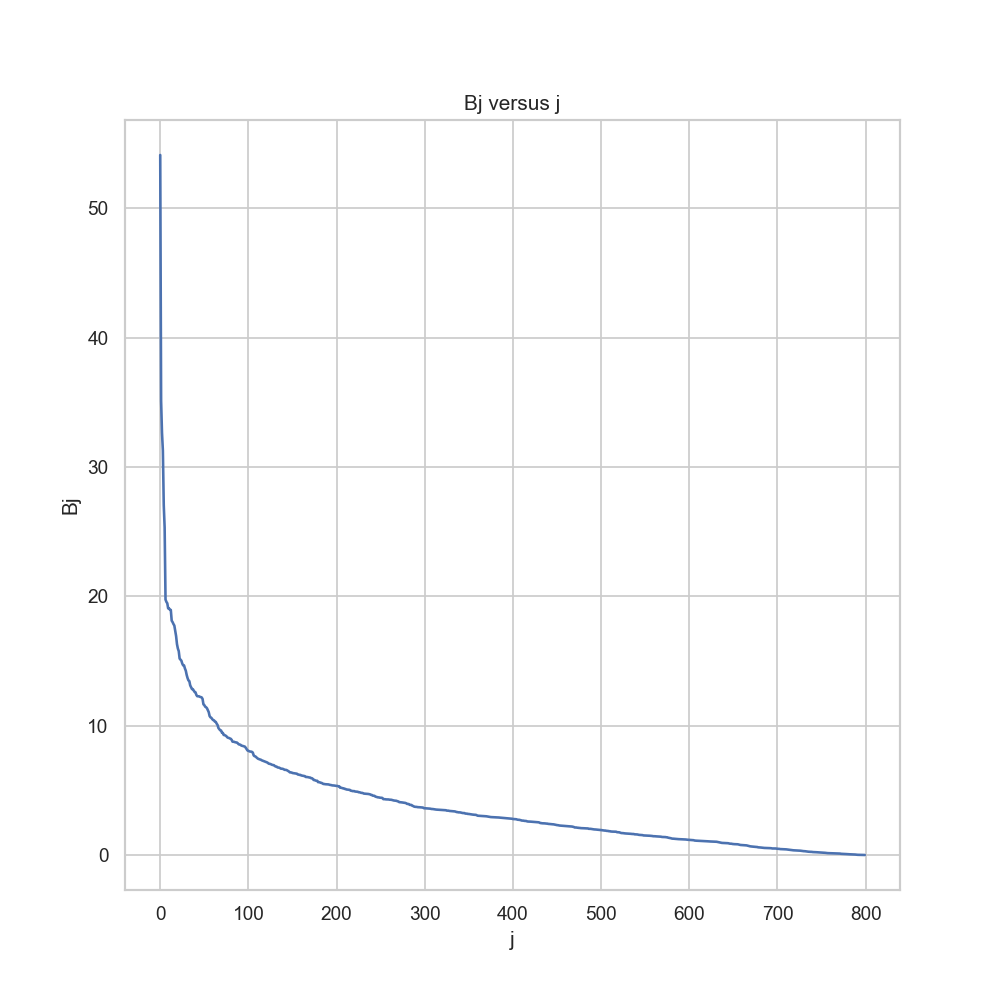

In [261]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(A_best)), B) 
ax.set(title='Bj versus j', ylabel='Bj', xlabel='j')
plt.show()

In [262]:
b=np.empty(len(A_best))
for i in np.arange(len(A_best)):
    b[i]=sum(B[:i])/sum(B)

<IPython.core.display.Javascript object>


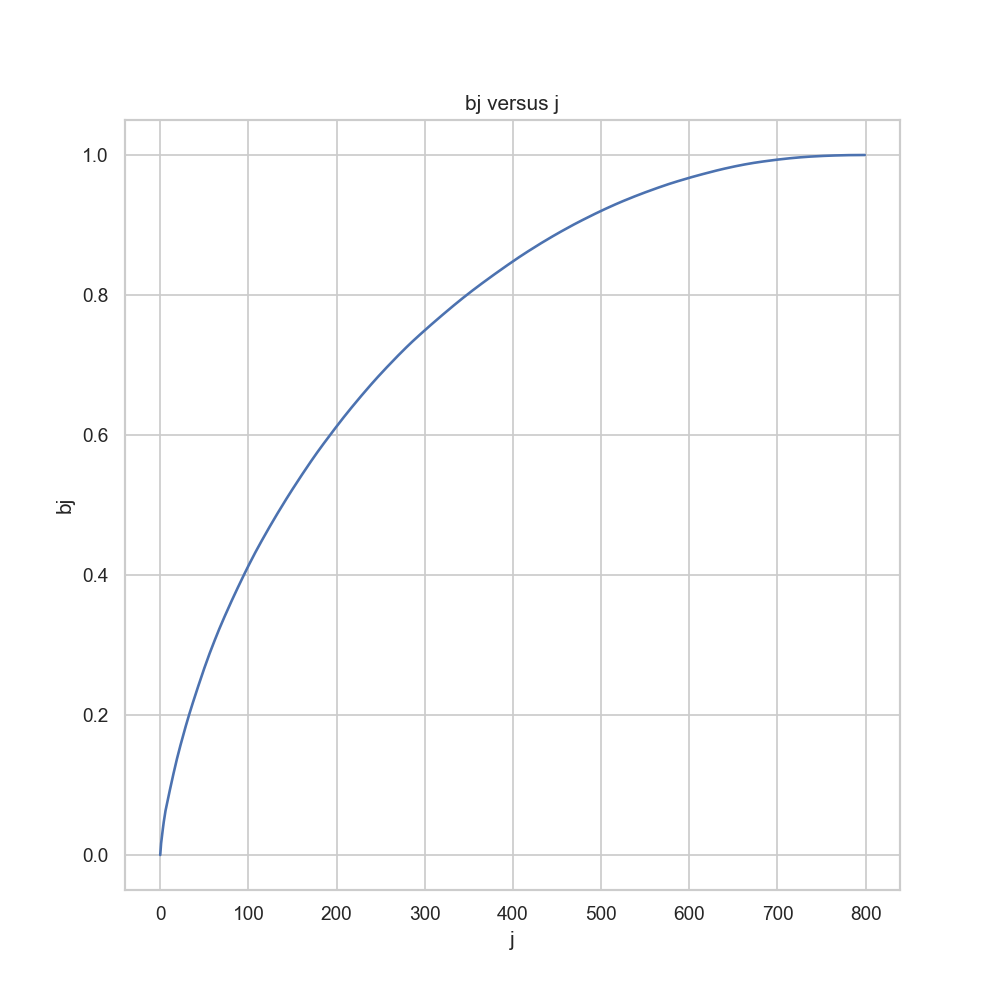

In [263]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(A_best)), b) 
ax.set(title='bj versus j', ylabel='bj', xlabel='j')
plt.show()

In [264]:
for i in range(len(A_best)):
    if b[i]>0.99:
        min_b = i
        break
print(min_b, B[min_b])

680 0.588124714022257


In [265]:
THR = B[min_b]
THR

0.588124714022257

In [266]:
print((A_abs>THR).sum())

680


In [267]:
A_best.shape

(800,)

In [268]:
A_best[A_best < THR] = 0
A_reduced = A_best.copy()

In [269]:
import time
start_time = time.time()

l_tr = len(x_train)
l_ts = len(x_test)
    
pred_train_red = np.empty(l_tr)
for i in range(l_tr):
    pred_train_red[i]=pred_tr(i, A_reduced)
etr = y_train - pred_train_red
RMSEtr = np.sqrt(sum(etr**2)/l_tr)
avytr = sum(y_train)/len(y_train)
res_tr = RMSEtr/avytr
print('RMSE for training set is', RMSEtr)
print('The resultant error for training set is', res_tr)
    
pred_test_red = np.empty(l_ts)
for i in range(l_ts):
    pred_test_red[i]=pred_ts(i, A_reduced)
ets = y_test - pred_test_red
RMSEts = np.sqrt(sum(ets**2)/l_ts) 
avyts = sum(y_test)/len(y_test)
res_ts = RMSEts/avyts
print('RMSE for test set is', RMSEts)
print('The resultant error for test set is', res_ts)
    
    
end_time=time.time()
total_time = round(end_time - start_time,3)
print('\nTime:', total_time, 'seconds.')

RMSE for training set is 39.592480614372455
The resultant error for training set is 0.22129674797806595
RMSE for test set is 36.83696225938672
The resultant error for test set is 0.21148668447499247

Time: 193.541 seconds.


<IPython.core.display.Javascript object>


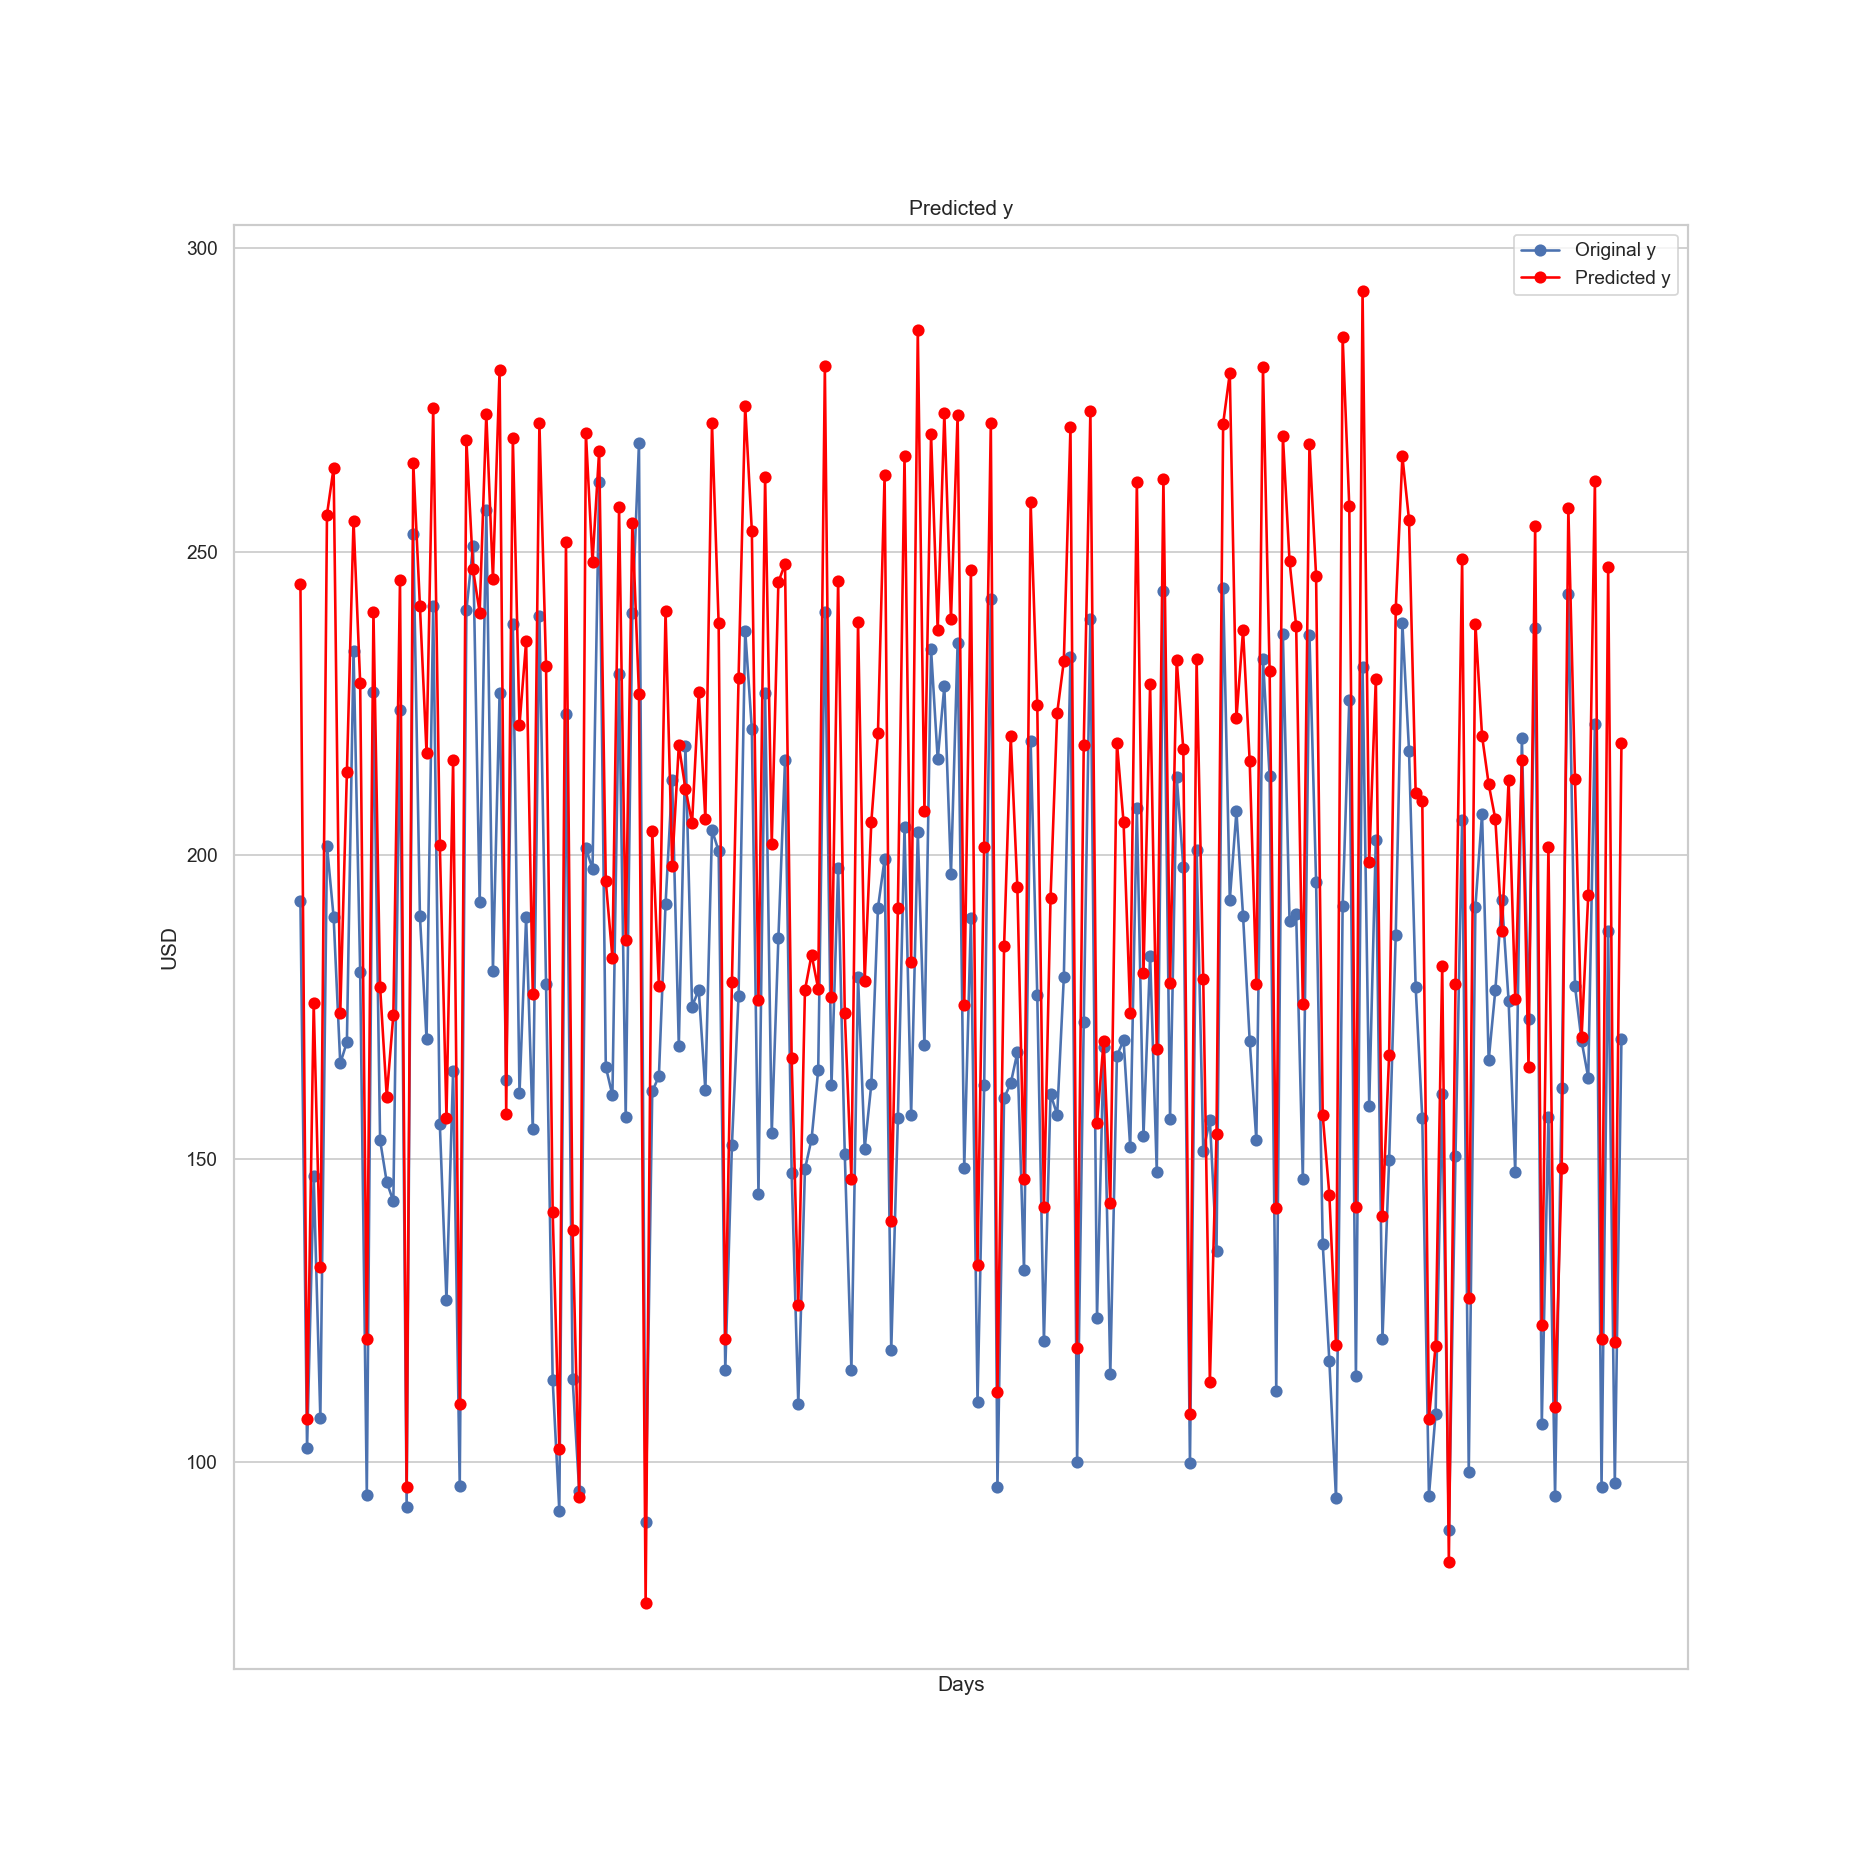

In [270]:
plt.figure(figsize=(15, 15))
plt.plot(y_test, label='Original y', marker = 'o')
plt.plot(pred_test_red, color='red', label='Predicted y', marker = 'o')
plt.xticks([],[])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Predicted y')
plt.legend()
plt.show()

## Q 5

In [271]:
from sklearn.kernel_ridge import KernelRidge
#define best parameters
gamma =0.07
lmbda = 0.9
#built in KRR function
KRR = KernelRidge(kernel='rbf', gamma = gamma, alpha=1/lmbda)
f = KRR.fit(x_train, y_train)
y_tr = f.predict(x_train)
y_ts = f.predict(x_test)

In [272]:
l_tr = len(x_train)
etr = y_train - y_tr
RMSEtr = np.sqrt(sum(etr**2)/l_tr)
avytr = sum(y_train)/len(y_train)
res_tr = RMSEtr/avytr
print('RMSE for training set is', RMSEtr)
print('The resultant error for training set is', res_tr)

RMSE for training set is 42.228578742840114
The resultant error for training set is 0.23603085743846672


In [273]:
l_ts = len(x_test)
ets = y_test - y_ts
RMSEts = np.sqrt(sum(ets**2)/l_ts) 
avyts = sum(y_test)/len(y_test)
res_ay = RMSEts/avyts
print('RMSE for test set is', RMSEts)
print('The resultant error for test set is', res_ts)

RMSE for test set is 70.6209132400699
The resultant error for test set is 0.21148668447499247


<IPython.core.display.Javascript object>


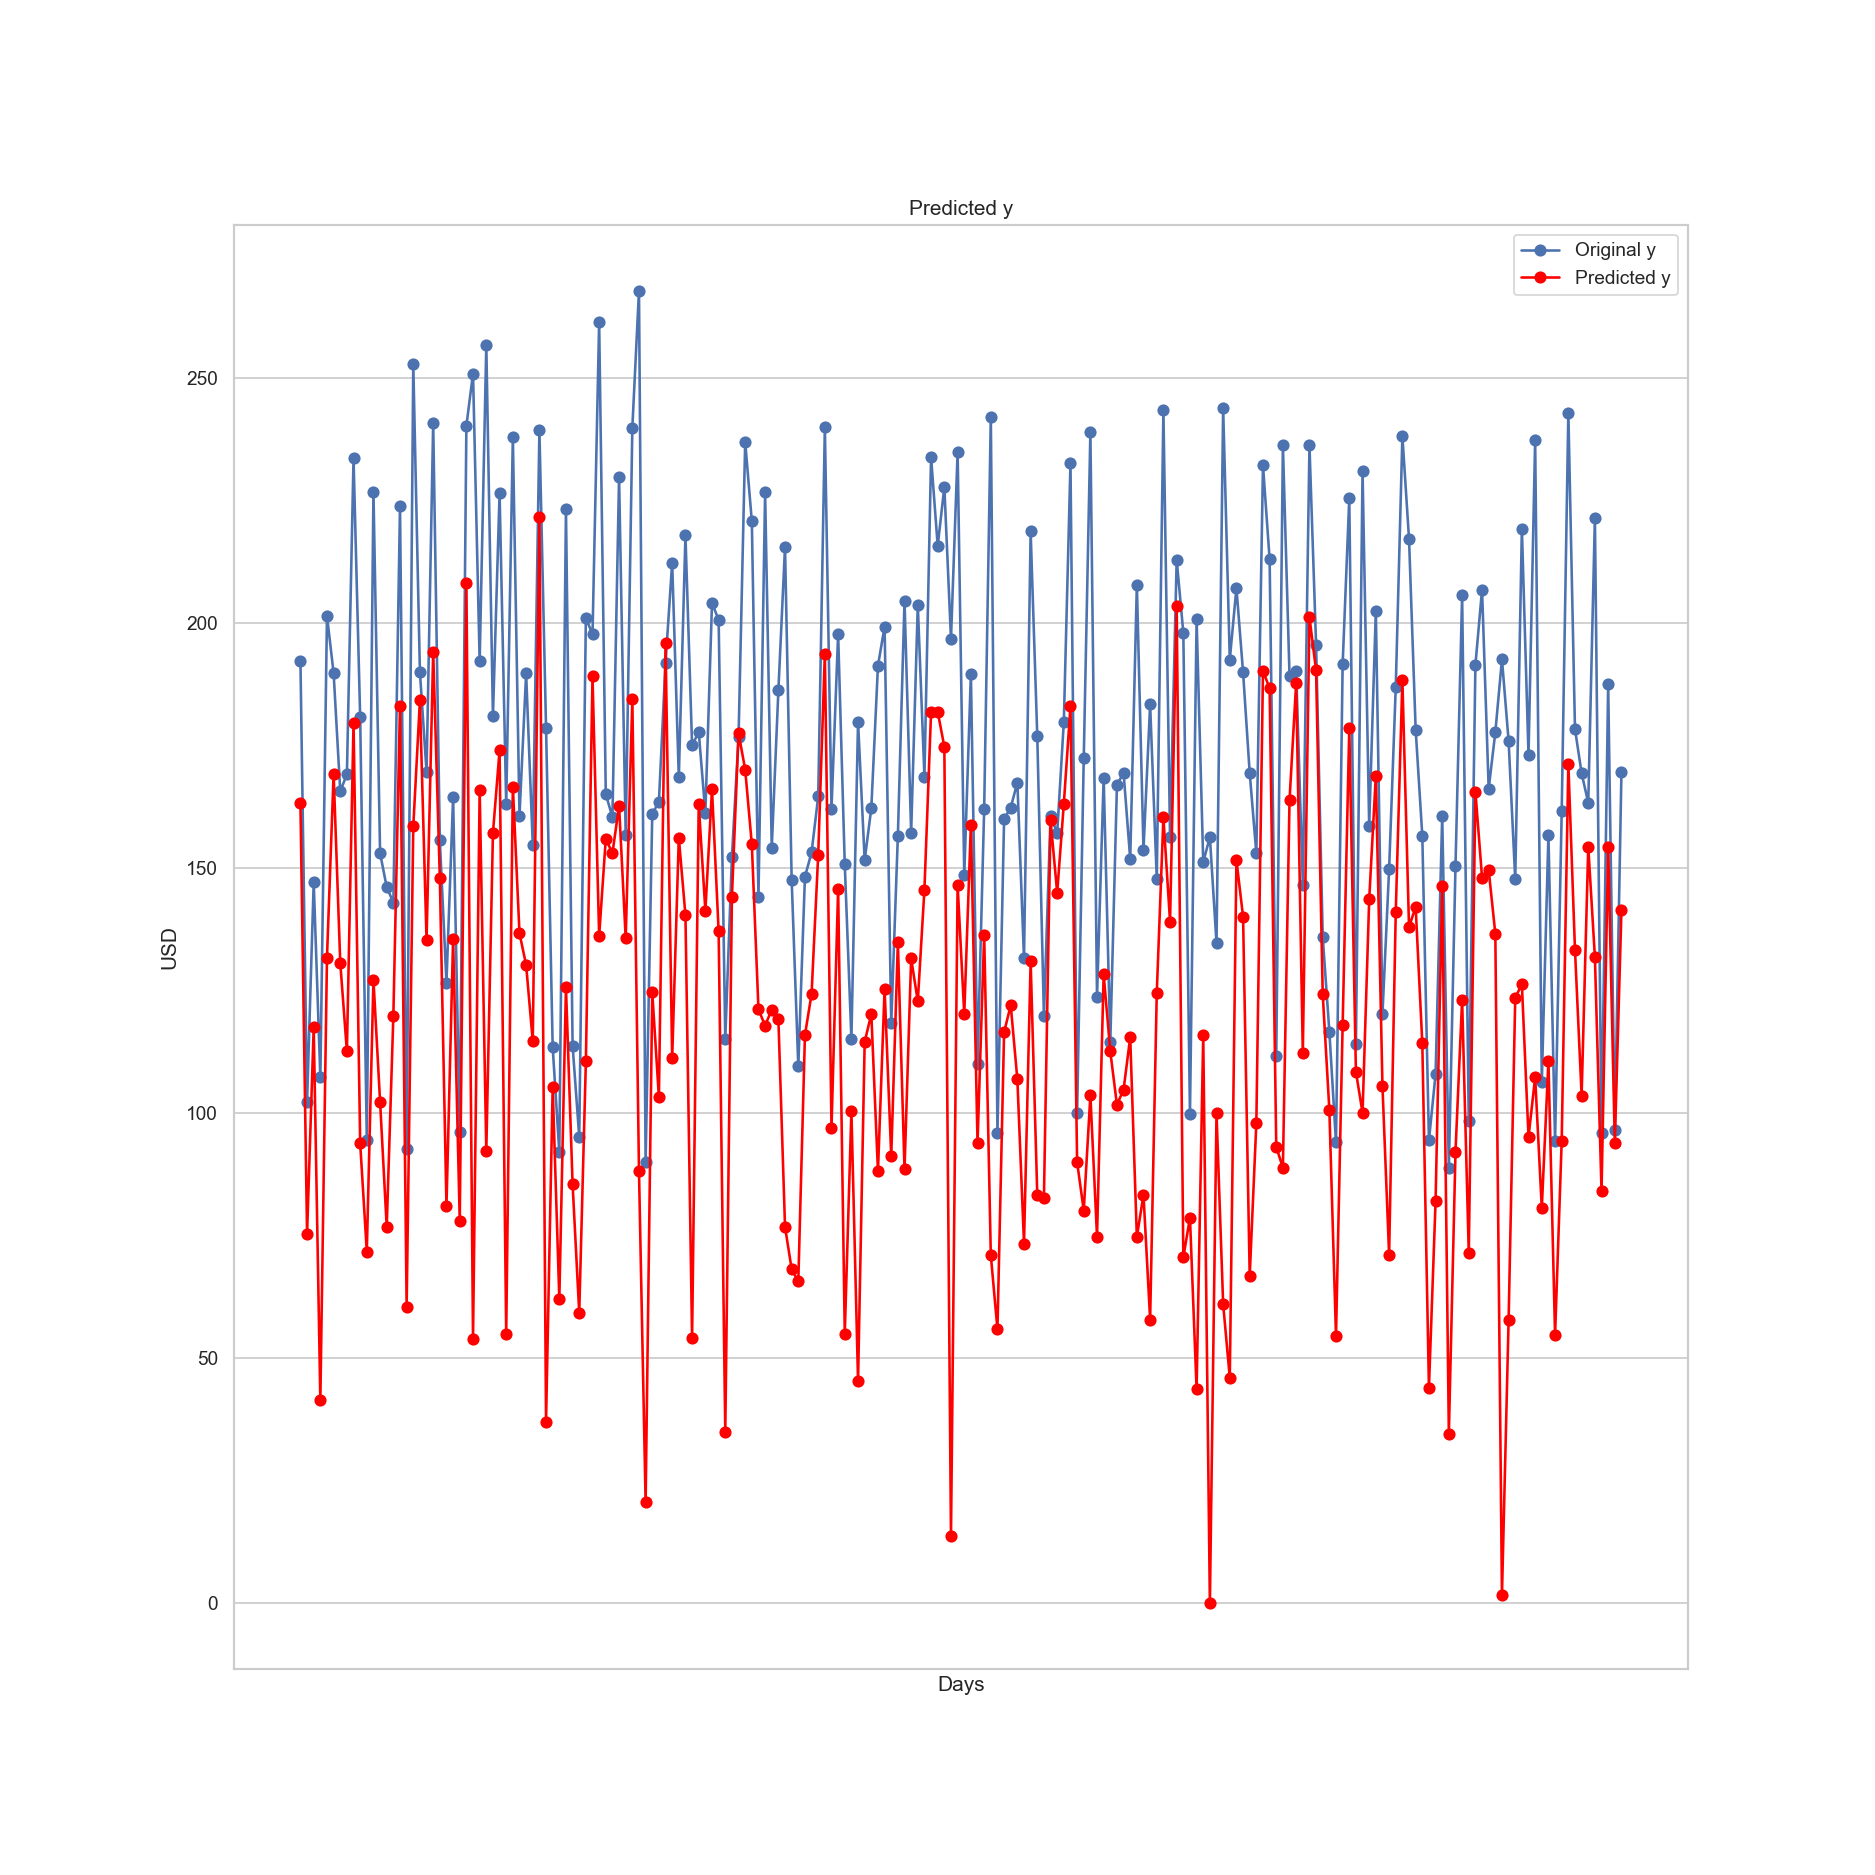

In [275]:
plt.figure(figsize=(15, 15))
plt.plot(y_test, label='Original y', marker = 'o')
plt.plot(y_ts, color='red', label='Predicted y', marker = 'o')
plt.xticks([],[])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Predicted y')
plt.legend()
plt.show()